# IIA 2024 - Aprendizaje Automatizado

## Introducción a Redes Neuronales

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn as skl
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier

from copy import deepcopy

In [ ]:
# Parámetros
"""
Comenzar y frenar el entrenamiento de una red es costoso, por lo que no
mediremos las métricas una vez por época, sino que haremos varias épocas a la
vez. Por ésto definimos sub-épocas, por ejemplo como 10, para realizar 10 épocas
a la vez y luego medir las métricas de error.
"""
sub_epocas=10   # numero de epocas que entrena cada vez
super_epocas=100 # numero de veces que realizaremos sub-epocas
# epocas = sub_epocas * super_epocas
eta=0.01        # learning rate
alfa=0.9        # momentum
N2=4            # neuronas en la capa oculta

## Definimos nuestras redes

In [ ]:
# Defino MLP para regresión
regr = MLPRegressor(
    hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0,
    batch_size=1, learning_rate='constant', learning_rate_init=eta,
    momentum=alfa,nesterovs_momentum=False, tol=0.0, warm_start=True,
    max_iter=sub_epocas
)

print(regr)

MLPRegressor(activation='logistic', alpha=0.0, batch_size=1,
             hidden_layer_sizes=(4,), learning_rate_init=0.01, max_iter=10,
             nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)


In [ ]:
# Defino MLP para clasificación
clasif = MLPClassifier(
    hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0,
    batch_size=1, learning_rate='constant', learning_rate_init=eta,
    momentum=alfa, nesterovs_momentum=False, tol=0.0, warm_start=True,
    max_iter=sub_epocas
)

print(clasif)

MLPClassifier(activation='logistic', alpha=0.0, batch_size=1,
              hidden_layer_sizes=(4,), learning_rate_init=0.01, max_iter=10,
              nesterovs_momentum=False, solver='sgd', tol=0.0, warm_start=True)


## Entrenamos

> **Warning**: el entrenamiento de las redes es computacionalmente pesado. Algunos de los entrenamientos que se plantean en el trabajo llevan varios minutos, dependiendo de la velocidad del procesador. El tiempo máximo en Google Colab fue de alrededor de 10 minutos. Tengan eso en cuenta para hacer el trabajo.



In [ ]:
def cargar_csv(path, xcols=2):
    """
    Argumentos:
      path (str): ruta al archivo csv a cargar
      xcols (int): cantidad de columnas que representan las entradas,
        la columna restante representara la clase o dato de salida
    """
    df = pd.read_csv(path, header=None)
    X = df.loc[:, 0:(xcols-1)]
    y = df.loc[:, xcols]
    return X,y

In [ ]:
def entrenar_red(red, evaluaciones,
                 X_train, y_train,
                 X_val,   y_val,
                 X_test,  y_test):
    """
    Función que entrena una red ya definida previamente "evaluaciones" veces,
    cada vez entrenando un número de épocas elegido al crear la red y midiendo
    el error en train, validación y test al terminar ese paso de entrenamiento.
    Guarda y devuelve la red en el paso de evaluación que da el mínimo error de
    validación.

    Argumentos:
      red: red neuronal predefinida
      evaluaciones (int): las veces que evalua
      X_{}: los conjuntos de valores de entrada de train, validación y test
      y_{}: los conjuntos de valores de salida o clase

    Salidas:
      red: la red entrenada en el mínimo de validación
      error_{}: los errores de: train, validación y test medidos en cada
        evaluación
    """
    error_train = []
    error_val = []
    error_test = []
    best_val = 1.0
    best_red = red
    for epoch in range(evaluaciones):
      # red.partial_fit(X_train, y_train, classes=[0,1])
      ## Podríamos llamar partial_fit para realizar una sóla pasada a la vez,
      ## pero al ser muy costoso frenar y reanudar el entrenamiento realizamos
      ## varias épocas a la vez. Recordemos que la red fue definida con el
      ## parámetro 'sub-epocas', con lo cual cada llamado a 'fit' realiza esa
      ## cantidad de épocas
      red.fit(X_train, y_train)
      # error de training
      error_train.append(1 - red.score(X_train, y_train))
      # error de validacion
      cur_val = 1 - red.score(X_val, y_val)
      error_val.append(cur_val)
      # error de test
      error_test.append(1 - red.score(X_test, y_test))
      if best_val > cur_val:
        best_val = cur_val
        best_red = deepcopy(red)
    return best_red, error_train, error_val, error_test

In [ ]:
# Cargamos los datos...
X, y = cargar_csv('xor.csv')

# Hacemos el split de training y testing
X2, X_test, y2, y_test = skl.model_selection.train_test_split(
    X, y, test_size=0.2)  # para xor de 200 me quedan 40 de test

# y spliteamos el training en training y validacion
X_train, X_val, y_train, y_val = skl.model_selection.train_test_split(
    X2, y2, test_size=0.2)  # para xor de 160 me quedan 32 de val

# Corremos el entrenamiento
clasif, e_train, e_val, e_test = entrenar_red(
    clasif, super_epocas, X_train, y_train, X_val, y_val, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


## Ploteamos Algunas Métricas

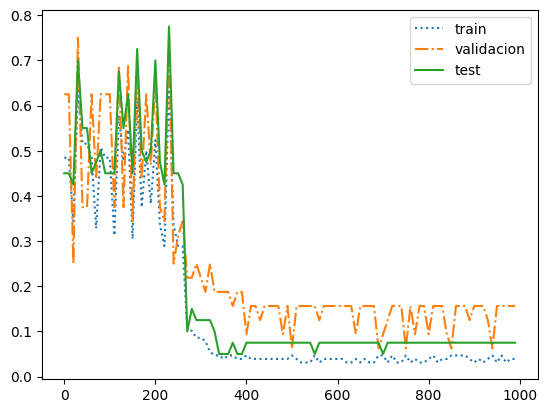

In [ ]:
rango = np.array(range(super_epocas)) * sub_epocas
plt.plot(rango, e_train, label="train", linestyle=":")
plt.plot(rango, e_val, label="validacion", linestyle="-.")
plt.plot(rango, e_test, label="test", linestyle="-")
plt.legend()
plt.show()

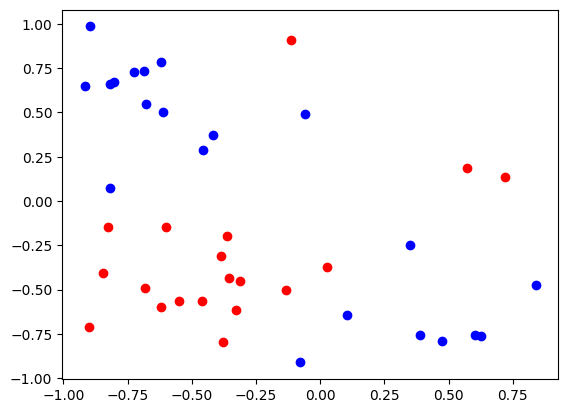

In [ ]:
y_out = clasif.predict(X_test)
X_out = X_test.copy()
X_out[2] = y_out

# diferenciar entre clase 0 y clase 1
c0 = X_out.loc[X_out[2] == 0]
c1 = X_out.loc[X_out[2] == 1]

xs0 = c0[0].values.tolist()
ys0 = c0[1].values.tolist()

xs1 = c1[0].values.tolist()
ys1 = c1[1].values.tolist()

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()

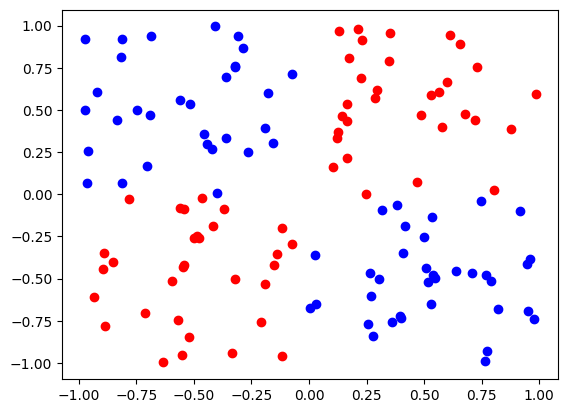

In [ ]:
# diferenciar entre clase 0 y clase 1
Xt = X_train.copy()
Xt[2] = y_train
c0 = Xt.loc[Xt[2] == 0]
c1 = Xt.loc[Xt[2] == 1]

xs0 = c0[0].values.tolist()
ys0 = c0[1].values.tolist()

xs1 = c1[0].values.tolist()
ys1 = c1[1].values.tolist()

plt.scatter(xs0, ys0, color='red')
plt.scatter(xs1, ys1, color='blue')
plt.show()